In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from IPython.display import Image
from IPython.display import display

###Adapted from Probabilistic-Programming-and-Bayesian-Methods-for-Hackers, Chapter 2

###From http://www.edwardtufte.com/tufte/ebooks, in "Visual and Statistical Thinking: Displays of Evidence for Making Decisions":

####On January 28, 1986, the space shuttle Challenger exploded and seven astronauts died because two rubber O-rings leaked. These rings had lost their resiliency because the shuttle was launched on a very cold day. Ambient temperatures were in the low 30s and the O-rings themselves were much colder, less than 20F.

####One day before the flight, the predicted temperature for the launch was 26F to 29F. Concerned that the rings would not seal at such a cold temperature, the engineers who designed the rocket opposed launching Challenger the next day.

####But they did not make their case persuasively, and were over-ruled by NASA.


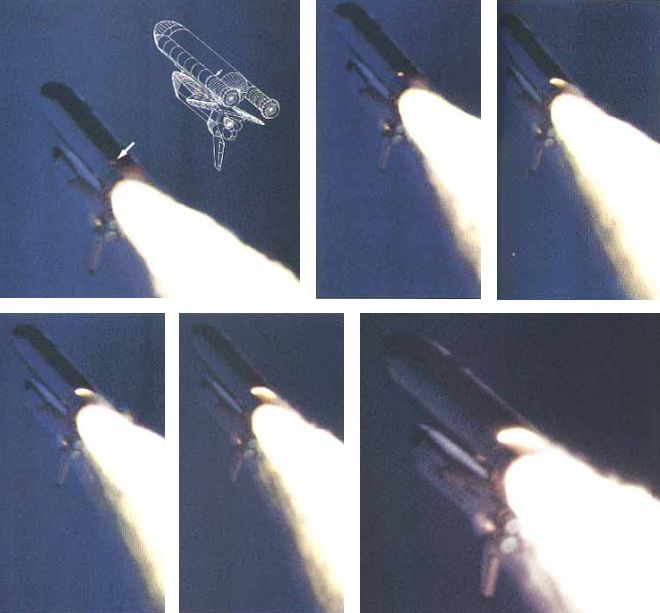

In [2]:
Image("/Users/mrgholt/GADS-22-NYC/Images/challenger4.jpg")

####The image above shows the leak, where the O-ring failed.

#Challenger O-ring Failure Data

In [3]:
data = pd.read_csv("/Users/mrgholt/GADS-22-NYC/Datasets/challenger_oring.csv", 
                   header=False,
                   names=["date", "temp", "failure"]).dropna()

In [4]:
data

,date,temp,failure
0,04/12/1981,66,0
1,11/12/1981,70,1
2,3/22/82,69,0
4,01/11/1982,68,0
5,04/04/1983,67,0
6,6/18/83,72,0
7,8/30/83,73,0
8,11/28/83,70,0
9,02/03/1984,57,1
10,04/06/1984,63,1


In [5]:
#Make a new dataframe without the last row
data1 = pd.DataFrame(data[data.failure != 'Challenger Accident'])

In [6]:
#TODO: determine the types of data you have 

In [7]:
def determine_types(data):
    for i in data.columns:
        print i, type(data[i][0])

In [8]:
determine_types(data1)

date <type 'str'>
temp <type 'numpy.int64'>
failure <type 'str'>


In [9]:
#TODO: convert the failure column to integers, and convert the date column to a consistent date format
#using the pd.to_datetime function. Hint: remember the apply function

In [10]:
data1['failure'] = data1['failure'].astype(int)

In [11]:
data1['date'] = data1['date'].apply(pd.to_datetime)

In [12]:
#You should now have a pandas timestamp type, and 2 integers types for the 3 columns of the dataframe

In [13]:
determine_types(data1)

date <class 'pandas.tslib.Timestamp'>
temp <type 'numpy.int64'>
failure <type 'numpy.int64'>


##Notes:

A value of "1" represents failure, of the O-ring. 

In [14]:
data1

,date,temp,failure
0,1981-04-12,66,0
1,1981-11-12,70,1
2,1982-03-22,69,0
4,1982-01-11,68,0
5,1983-04-04,67,0
6,1983-06-18,72,0
7,1983-08-30,73,0
8,1983-11-28,70,0
9,1984-02-03,57,1
10,1984-04-06,63,1


In [15]:
#TODO: Plot the data - Temperature on the x-axis and Failure on the y-axis. Just plot points

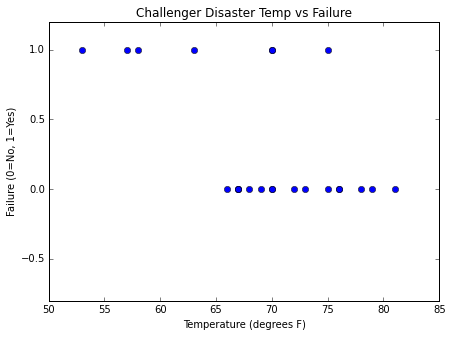

In [16]:
fig = plt.figure(figsize = (7,5))
ax = plt.subplot(111)
ax.set_ylim(-0.8, 1.2)
ax.plot(data1.temp, data1.failure, 'bo')
ax.set_title("Challenger Disaster Temp vs Failure")
ax.set_xlabel("Temperature (degrees F)")
ax.set_ylabel("Failure (0=No, 1=Yes)")

In [17]:
#TODO: Using a simple Linear Regression model (LinearRegression()) fit a line to the data and replot the points 
#and the line

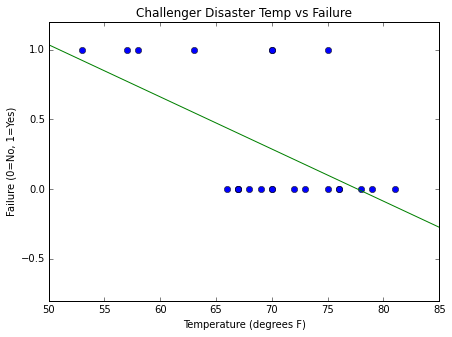

In [18]:
clf = LinearRegression()
clf.fit(data1[['temp']], data1['failure'])
x_plot = np.linspace(20, 90, 10).reshape(10, 1)

fig = plt.figure(figsize = (7,5))
ax = plt.subplot(111)
ax.set_ylim(-0.8, 1.2)
ax.set_xlim(50, 85)
ax.plot(data1.temp, data1.failure, 'bo')
ax.plot(x_plot, clf.predict(x_plot), color='green')
ax.set_title("Challenger Disaster Temp vs Failure")
ax.set_xlabel("Temperature (degrees F)")
ax.set_ylabel("Failure (0=No, 1=Yes)")

##Notes

This plot below has a classic sigmoid shape, so one might expect logistic regression to work. Furthermore, we do want to find the probability of failure and make predictions from there.

Logistic regression is carried out in the same way as linear. However, there is the matter of setting the regularization co-efficient "C"

The default C in sklearn is 1. The meaning of C is: the larger the C, the lesser the regularization. The smaller the C the higher the regularization. C must be a positive float. So a C = 1.0, the default, means a high degree of regularization, and a C = 10000, would mean much less regularization.

Scikit-learn Logistic Regression can use both L1, and L2 regularization.

Remember here, though, that we have just two co-efficents: an intercept, and the outside temperature. So we do not expect to need much regularization. Set C=1000.


In [19]:
#TODO: Fit a logistic regression model with a C value of 1000. 
#TODO: Make sure you can find the probabilities and predictions within the model structure, so print out the
#probabilities using the x_plot evenly spaced x-axis points defined above. Assign the probabilities to a variable
#called 'probabilities'
#TODO: Print out the class predictions as well (using x_plot)
#Assign the class predictions to a variable called 'predictions'

In [20]:
clfLR = LogisticRegression(C=1000)
clfLR.fit(data1[['temp']], data1['failure'])

probabilities = clfLR.predict_proba(x_plot)[:,1].ravel()
print "Here are the proabilities: ", probabilities

predictions = clfLR.predict(x_plot)
print "Here are the class predictions: ", predictions

Here are the proabilities:  [ 0.99993492  0.99964965  0.99811646  0.98994116  0.94812614  0.77244192
  0.38666086  0.10480957  0.02128136  0.00402205]
Here are the class predictions:  [1 1 1 1 1 1 0 0 0 0]


In [21]:
#TODO: Uncomment the plot below and make sure you can see the 3 subsets of data

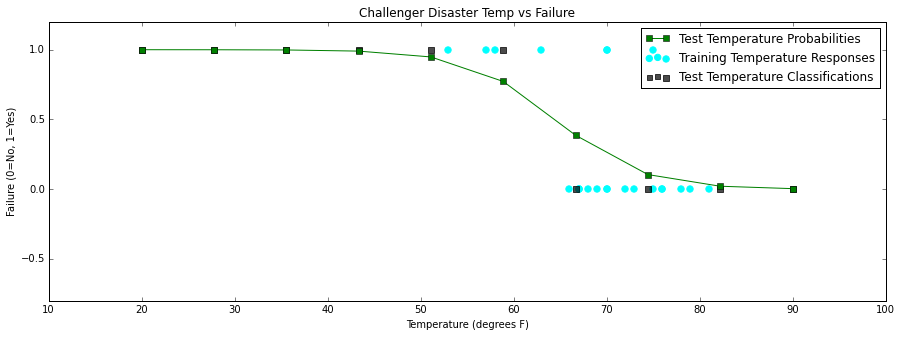

In [22]:
fig = plt.figure(figsize = (15,5))
ax = plt.subplot(111)
ax.set_ylim(-0.8, 1.2)

ax.scatter(data1.temp, data1.failure, s=40, color='aqua', marker='o', label='Training Temperature Responses')

ax.plot(x_plot, probabilities, marker='s', color='green', label='Test Temperature Probabilities')

ax.scatter(x_plot, predictions, marker='s', color='black', s=30, alpha=0.7, label='Test Temperature Classifications')

ax.set_title("Challenger Disaster Temp vs Failure")
ax.set_xlabel("Temperature (degrees F)")
ax.set_ylabel("Failure (0=No, 1=Yes)")
ax.legend(loc='best')

In [23]:
#The logistic regression models also report a 'score'
#TODO: modify the code below to print out the score from your logistic regression model
#TODO: print out the confusion matrix for your logistic regression model

In [24]:
print 20.0/23.0
print clfLR.score(data1[['temp']], data1['failure'])

0.869565217391
0.869565217391


In [25]:
cm = pd.crosstab(data1['failure'], clfLR.predict(data1[['temp']]), rownames=["Actual"], colnames=["Predicted"])
cm

Predicted,0,1
Actual,,
0,16,0
1,3,4


##Logistic Regression with K-folds Cross Validation

Because the dataset is very small (23 records) we will use K-folds cross validation. Use K=5

Using K-folds cross validation let's optimize the value for C

Insist that the Logistic Regression model uses L2 by setting the 'penalty' parameter

In [26]:
#TODO: In a separate cell test out what np.logspace does

In [27]:
m = len(data1['temp'].values)

#create a list of C values from which to optimize
C_list = list(np.logspace(-4, 5, 100))

#Pull the data from pandas suitable for use with K-folds
X = data1['temp'].values
X = X.reshape(m, 1)

y = data1['failure'].values

#C increases (not decreases like the linear regression regularization!)
max_score = 1e-99

#Traverse over the values in the C_list
for myC in C_list:
    
    #create the KFolds object
    kf = KFold(m, n_folds = 5)
    
    #create a list to keep the scores from each model
    score_list = []   
    
    #Loop over the indices created by the Kfolds object
    for train_index, test_index in kf:
        
        #create the train and test sets
        X_train, y_train, X_test, y_test = X[train_index], y[train_index], \
                                            X[test_index], y[test_index]
            
        #create and fit a model using the value of C and an l2 penalty
        clfLR3 = LogisticRegression(C=myC, penalty='l2')
        clfLR3.fit(X_train, y_train)
        
        #Extract the score for the model on the validation set and append it to the score list
        score_list.append(clfLR3.score(X_test, y_test))
    
    #convert the score list to an np array and then take the mean
    sl = np.array(score_list)
    
    #if the mean of the scores exceeds the maximum score then remember the score and the value of C
    if sl.mean() > max_score:
        max_score = sl.mean()
        max_C_value = myC
        
    
#print out the best score and the maximum value of C    
print max_score, max_C_value

0.83 28.4803586844


In [28]:
#TODO: Using the value of C from above rebuild and refit the logistic regression model and print out a confusion
#matrix for the entire dataset. How does it compare with the original confusion matrix?

In [29]:
clfLR4 = LogisticRegression(C=max_C_value)
clfLR4.fit(data1[['temp']], data1['failure'])
cm = pd.crosstab(data1['failure'], clfLR4.predict(data1[['temp']]), rownames=["Actual"], colnames=["Predicted"])
cm

Predicted,0,1
Actual,,
0,16,0
1,4,3


In [30]:
#TODO: Print out the probabilities and the class predictions using x_plot and this model

In [31]:
probabilities4 = clfLR4.predict_proba(x_plot)[:,1].ravel()
print "Here are the proabilities: ", probabilities4

predictions4 = clfLR4.predict(x_plot)
print "Here are the class predictions: ", predictions4

Here are the proabilities:  [ 0.98883599  0.97410358  0.94108801  0.87153186  0.74233701  0.55026221
  0.34193334  0.18077419  0.08568231  0.03827424]
Here are the class predictions:  [1 1 1 1 1 1 0 0 0 0]


In [32]:
#Now let's compare the 2 models
#NOTICE the single point for which the classification has changed

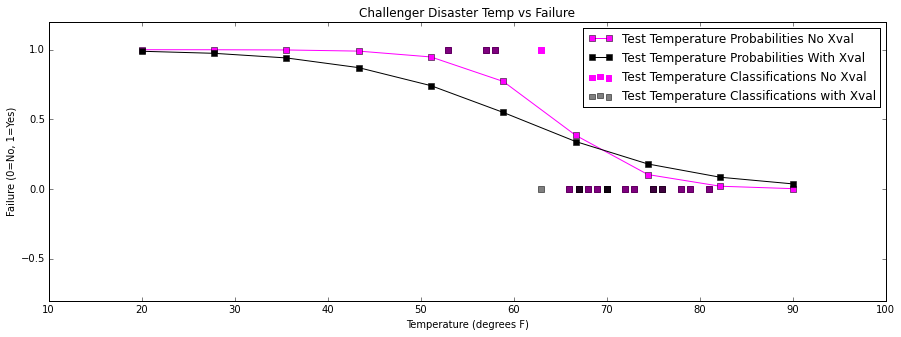

In [33]:
fig = plt.figure(figsize = (15,5))
ax = plt.subplot(111)
ax.set_ylim(-0.8, 1.2)

ax.plot(x_plot, probabilities, marker='s', color='magenta', label='Test Temperature Probabilities No Xval')
ax.scatter(data1['temp'], clfLR.predict(data1[['temp']]), marker='s', \
           color='magenta', s=30, alpha=1.0, label='Test Temperature Classifications No Xval')

ax.plot(x_plot, probabilities4, marker='s', color='black', label='Test Temperature Probabilities With Xval')
ax.scatter(data1['temp'], clfLR4.predict(data1[['temp']]), marker='s', \
           color='black', s=30, alpha=0.5, label='Test Temperature Classifications with Xval')

ax.set_title("Challenger Disaster Temp vs Failure")
ax.set_xlabel("Temperature (degrees F)")
ax.set_ylabel("Failure (0=No, 1=Yes)")
ax.legend(loc='best')

We note that the true story was even worse than our data made it out to be! We did not take the severity of the incidents into account. How could we have incorporated this severity into our analysis? (the following images images are taken from Tufte's booklet).

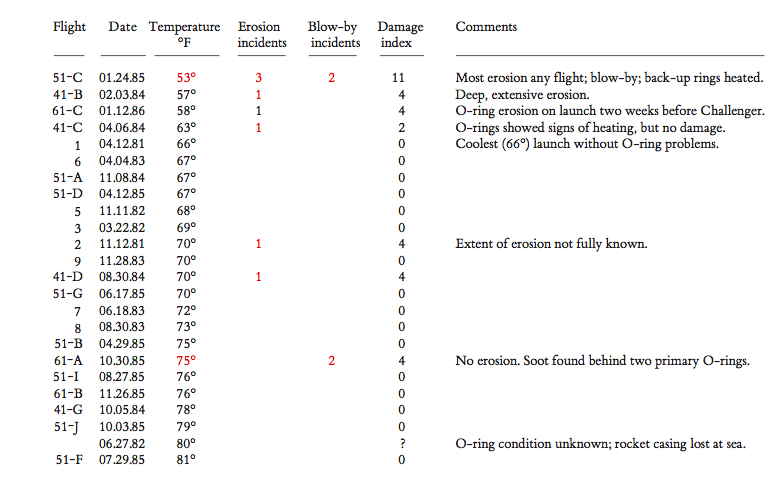

In [34]:
Image("/Users/mrgholt/GADS-22-NYC/Images/challenger_all_table.png")

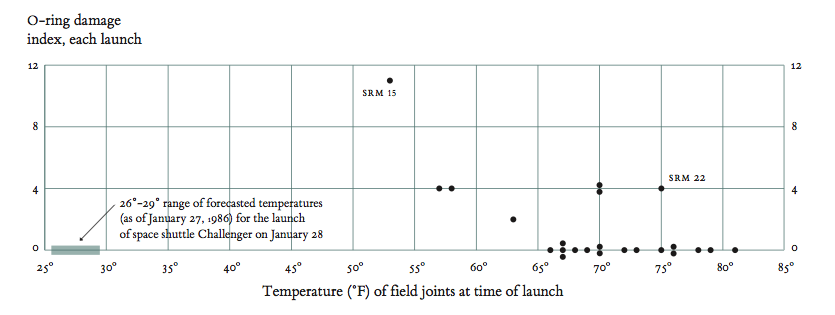

In [36]:
Image("/Users/mrgholt/GADS-22-NYC/Images/chall-damage.png")